In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pathZip = "/content/drive/MyDrive/Colab Notebooks/Food_Data.zip"

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import os
import zipfile

import cv2
import seaborn as sns

import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU, Dropout, Flatten
from tensorflow.keras import backend
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras. callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import losses, optimizers
from tensorflow.keras.preprocessing.image import load_img
from google.colab.patches import cv2_imshow

In [4]:
with zipfile.ZipFile(pathZip, 'r') as zip_ref:
  zip_ref.extractall()

# **Preparing the Data**

The Dataset has two folders i.e. "Training" and "Testing." Each of these folders has three subfolders, named "Bread," "Soup," and "Vegetable-Fruit." We will have the Training and the Testing path stored in a variable named "DATADIR." The names of the sub-folders will be the classes for our classification task and will be stored in an array called "CATEGORIES."

In [5]:
DATADIR = '/content/Food_Data/Training'
CATEGORIES = ['Bread', 'Soup', 'Vegetable-Fruit']
IMG_SIZE = 150

In [6]:
training_data = []

def create_training_data():
  for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    class_num = category

    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        training_data.append([new_array, class_num])


In [7]:
create_training_data()

In [8]:
DATADIR2 = '/content/Food_Data/Testing'

In [9]:
testing_data = []

def create_testing_data():
  for category in CATEGORIES:
    path = os.path.join(DATADIR2, category)
    class_num = category

    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        testing_data.append([new_array, class_num])

In [10]:
create_testing_data()

In [11]:
training_data[0]

[array([[[ 88,  95,  68],
         [ 95, 100,  81],
         [101, 105,  93],
         ...,
         [ 72,  93, 108],
         [ 71,  93, 108],
         [ 69,  92, 105]],
 
        [[ 80,  84,  67],
         [ 88,  92,  74],
         [ 92,  99,  79],
         ...,
         [ 66,  89, 104],
         [ 65,  90, 104],
         [ 62,  88, 102]],
 
        [[ 70,  71,  62],
         [ 81,  86,  68],
         [ 82,  91,  64],
         ...,
         [ 62,  86,  98],
         [ 62,  87, 101],
         [ 55,  81,  95]],
 
        ...,
 
        [[140, 170, 174],
         [136, 160, 164],
         [115, 142, 146],
         ...,
         [ 96, 126, 131],
         [ 94, 123, 130],
         [ 92, 121, 128]],
 
        [[136, 168, 167],
         [122, 148, 150],
         [127, 152, 158],
         ...,
         [ 94, 121, 125],
         [ 94, 121, 127],
         [ 92, 121, 127]],
 
        [[123, 159, 155],
         [128, 158, 159],
         [138, 164, 171],
         ...,
         [ 93, 116, 121],
  

In [12]:
training_data[0][0].shape

(150, 150, 3)

**Bread**

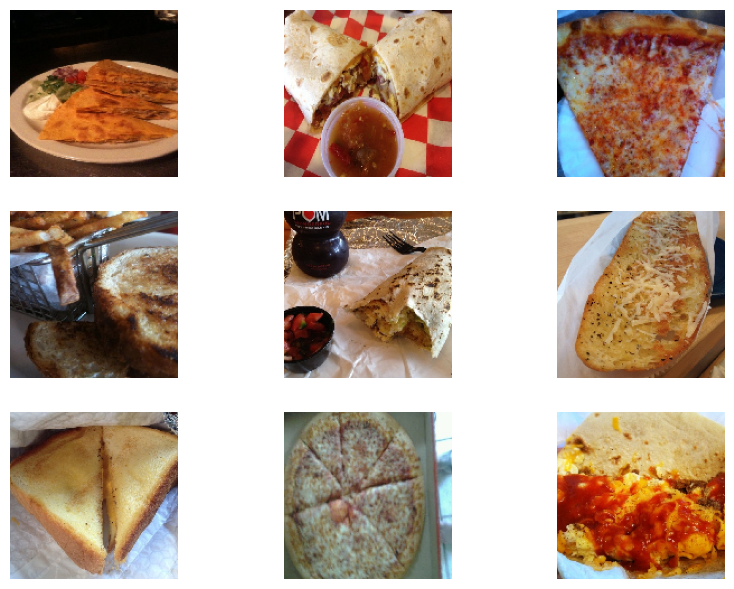

In [13]:
bread_imgs = [fn for fn in os.listdir(f'{DATADIR}/{CATEGORIES[0]}')]
select_bread = np.random.choice(bread_imgs, 9, replace=False)

fig = plt.figure(figsize = (10,10))
for i in range(9):
  ax = fig.add_subplot(4,3,i+1)
  fp = f'{DATADIR}/{CATEGORIES[0]}/{select_bread[i]}'
  fn = load_img(fp, target_size = (150,150))
  plt.imshow(fn, cmap = 'Greys_r')
  plt.axis('off')
plt.show()

**Soup**

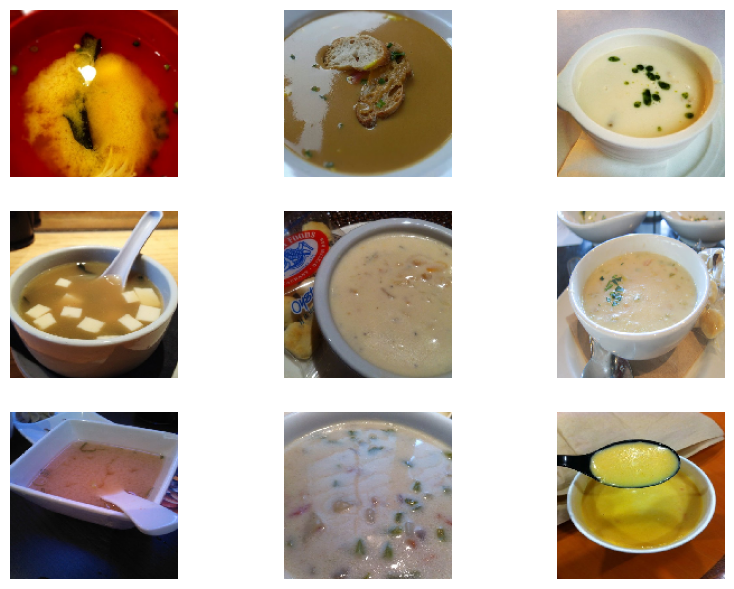

In [14]:
soup_imgs = [fn for fn in os.listdir(f'{DATADIR}/{CATEGORIES[1]}')]
select_soup = np.random.choice(soup_imgs, 9, replace=False)

fig = plt.figure(figsize = (10,10))
for i in range(9):
  ax = fig.add_subplot(4,3,i+1)
  fp = f'{DATADIR}/{CATEGORIES[1]}/{select_soup[i]}'
  fn = load_img(fp, target_size = (150,150))
  plt.imshow(fn, cmap = 'Greys_r')
  plt.axis('off')
plt.show()

Most images of soup have a utensil so maybe that can be used as a differentiating trait from the other images.

**Vegetable-Fruit**

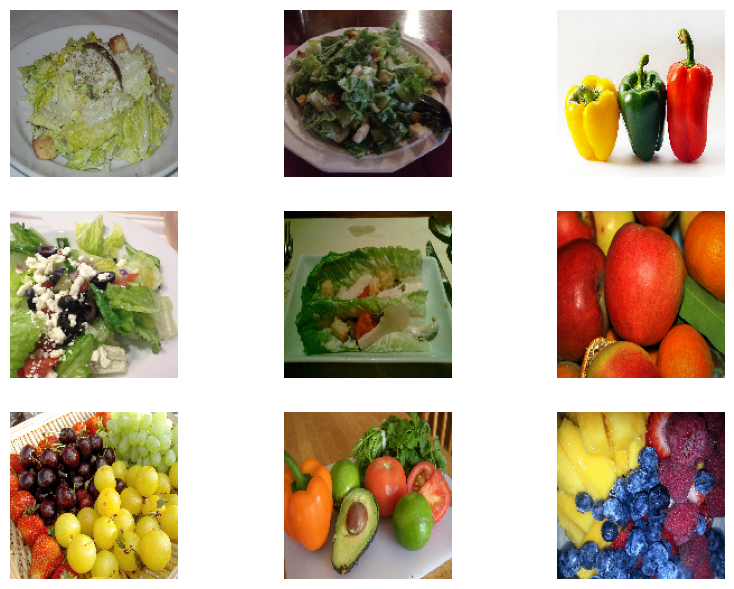

In [15]:
vegfru_imgs = [fn for fn in os.listdir(f'{DATADIR}/{CATEGORIES[2]}')]
select_vegfru = np.random.choice(vegfru_imgs, 9, replace=False)

fig = plt.figure(figsize = (10,10))
for i in range(9):
  ax = fig.add_subplot(4,3,i+1)
  fp = f'{DATADIR}/{CATEGORIES[2]}/{select_vegfru[i]}'
  fn = load_img(fp, target_size = (150,150))
  plt.imshow(fn, cmap = 'Greys_r')
  plt.axis('off')
plt.show()

# **Data Preprocessing**

The arrays training_data and testing_data had the images stored as arrays with their corresponding labels as the class indeces.

In the following cells, we will unpack the tuples and shuffle our training_data and testing_data, and store the images in X_train, and X_test, and the labels in Y_train, and Y_test

In [16]:
X_train = []
Y_train = []

np.random.shuffle(training_data)

for features, label in training_data:
  X_train.append(features)
  Y_train.append(label)

In [17]:
X_test = []
Y_test = []

np.random.shuffle(testing_data)
for features, label in testing_data:
  X_test.append(features)
  Y_test.append(label)

In [18]:
X_train = np.array(X_train)
X_test = np.array(X_test)
X_train.shape

(3203, 150, 150, 3)

In [19]:
Y_train = pd.DataFrame(Y_train, columns = ["Label"], dtype = object)
Y_test = pd.DataFrame(Y_test, columns = ["Label"], dtype = object)

# **Checking the distribution of classes**

In [20]:
count = Y_train.Label.value_counts()
print(count)

print('*'*10)

count = Y_train.Label.value_counts(normalize= True)
print(count)

Label
Soup               1500
Bread               994
Vegetable-Fruit     709
Name: count, dtype: int64
**********
Label
Soup               0.468311
Bread              0.310334
Vegetable-Fruit    0.221355
Name: proportion, dtype: float64


# **Normalizing the data**

In ANNs it is always suggested to normalize the feature inputs. The benefits incldue:



1.   Makes the training faster and reduces the chances of getting stuck at local optima
2.   In deep neural networks, normalization helps to avoid exploding gradient problems. Gradient exploding problem occurs when large error gradients accumulate and result in very large updates to neural network model weights during training. This makes a model unstable and unable to learn from the training data.

As we know image pixel values range from 0-255, here we are simply dividing all the pixel values by 255 to standardize all the images to have values between 0-1.



In [21]:
X_train = X_train/255.0
X_test = X_test/255.0

# **Encoding Target Variable**

For any ML or DL techniques, the labels must be encoded into numbers or arrays, so that we can compute the cost between the predicted and real labels.

In this case, we have 3 classes "Bread." "Soup," and "Vegetable-Fruit." We want the corresponding labels to look like:



*   [1,0,0] ====> Bread
*   [0,1,0] ====> Soup
*   [0,0,1] ====> Vegetable-Fruit

Each class will be represented in the form of an array.



In [22]:
Y_train_encoded = []

for label_name in Y_train["Label"]:
  if (label_name == 'Bread'):
    Y_train_encoded.append(0)

  if (label_name == 'Soup'):
    Y_train_encoded.append(1)

  if (label_name == 'Vegetable-Fruit'):
    Y_train_encoded.append(2)

Y_train_encoded = to_categorical(Y_train_encoded,3)
Y_train_encoded

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [23]:
Y_test_encoded = []

for label_name in Y_test["Label"]:
  if (label_name == 'Bread'):
    Y_test_encoded.append(0)
  if (label_name == 'Soup'):
    Y_test_encoded.append(1)
  if (label_name == 'Vegetable-Fruit'):
    Y_test_encoded.append(2)

Y_test_encoded = to_categorical(Y_test_encoded,3)
Y_test_encoded

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.]])

# **Model Building**

Now that we have done data preprocessing, let's build the first CNN model.

## **Model 1 Architecture**



*   The first CNN model will have three convolutional blocks
*   Each convolutional block will have a Conv2D layer and a MaxPooling2D Layer
*   Add first Conv2D layer with **64 filters** and a **kernel size of 3x3**. Use the 'same' padding and ReLu activation
*   Add MaxPooling2D layer with **kernel size 2x2** and use padding = 'same'
*   Add a second Conv2D layer with **32 filters** and a **kernel size of 3x**. Use the 'same' padding and ReLu activation
*   Follow it up with another MaxPooling2D layer **kernel size 2x2** and using padding = 'same'
*   Add a third Conv2D layer with **32 filters and the kernel size of 3x3** Use the 'same' padding and ReLu activation. Once again, follow it up with another MaxPooling2D layer with **kernel size 2x2** and padding = 'same'  
*   Once the convolutional blocks are added, add the flatten layer.
*   Finally, add dense layers
*   Add first dense layer with **100 neurons** and ReLu activation
*   The last dense layer must have as many neurons as the number of classes, which in this case is 3 and use **softmax** activation
*   Initialie SGD optimizer with **learning rate = 0.01** and **momentum = 0.9**
*   Compile your model using the optimizer you initialized and use **categorical_crossentropy** as the loss function and 'accuracy' as the metric
*   Print the model summary and write down your observations/ insights abou the model















In [24]:
from tensorflow.keras import backend
backend.clear_session()

np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [25]:
# Intializing a sequential model
model = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3, padding 'same' provides the output size same as the input size
# The input_shape denotes input image dimension
model.add(Conv2D(64, (3, 3), activation = 'relu', padding = "same", input_shape = (150, 150, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model.add(MaxPooling2D((2, 2), padding = 'same'))

# Adding second conv layer with 32 filters and kernel size 3x3, padding 'same' followed by a Maxpooling2D layer
model.add(Conv2D(32, (3, 3), activation = 'relu', padding = "same"))
model.add(MaxPooling2D((2, 2), padding = 'same'))

# Add third conv layer with 32 filters and kernel size 3x3, padding 'same' followed by a Maxpooling2D layer
model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2), padding = 'same'))

# Flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model.add(Flatten())

# Adding a fully connected dense layer with 100 neurons
model.add(Dense(100, activation = 'relu'))

# Adding the output layer with 3 neurons and activation functions as softmax since this is a multi-class classification problem
model.add(Dense(3, activation = 'softmax'))

# Using SGD Optimizer
opt = SGD(learning_rate = 0.01, momentum = 0.9)

# Compiling the model
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Generating the summary of the model
model.summary()



/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 75, 75, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 38, 38, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 38, 38, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 19, 19, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 11552)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │     1,155,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           303 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,185,107 (4.52 MB)

 Trainable params: 1,185,107 (4.52 MB)

 Non-trainable params: 0 (0.00 B)

# **Observations**



*   As we can see from the above summary, this CNN model will train and learn 1,185,107 parameters (weights and biases)
*   There are no non-trainable parameters in this model
*   This model is fairly large and we might expect overfitting




# **Training the Model**

Let us now train the model using the training data.

In [26]:
# The following lines of code saves the best model's parameters if training accuracy goes down on further training
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
mc = ModelCheckpoint('best_model.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)

# Fitting the model with 30 epochs and validation_split as 10%
history=model.fit(X_train,
          Y_train_encoded,
          epochs = 60,
          batch_size= 32, validation_split = 0.10, callbacks = [es, mc])

Epoch 1/60
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4230 - loss: 1.0733
Epoch 1: val_accuracy improved from -inf to 0.50779, saving model to best_model.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step - accuracy: 0.4234 - loss: 1.0731 - val_accuracy: 0.5078 - val_loss: 1.0246
Epoch 2/60
89/91 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4915 - loss: 0.9709
Epoch 2: val_accuracy improved from 0.50779 to 0.58879, saving model to best_model.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.4931 - loss: 0.9695 - val_accuracy: 0.5888 - val_loss: 0.8154
Epoch 3/60
89/91 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5624 - loss: 0.8764
Epoch 3: val_accuracy improved from 0.58879 to 0.60125, saving model to best_model.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.5631 - loss: 0.8756 - val_accuracy: 0.6012 - val_loss: 0.8435
Epoch 4/60
89/91 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5629 - loss: 0.8635
Epoch 4: val_accuracy improved from 0.60125 to 0.61682, saving model to best_model.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.5642 - loss: 0.8618 - val_accuracy: 0.6168 - val_loss: 0.7371
Epoch 5/60
89/91 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6341 - loss: 0.7329
Epoch 5: val_accuracy improved from 0.61682 to 0.67913, saving model to best_model.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.6347 - loss: 0.7325 - val_accuracy: 0.6791 - val_loss: 0.6838
Epoch 6/60
89/91 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6978 - loss: 0.6577
Epoch 6: val_accuracy improved from 0.67913 to 0.68847, saving model to best_model.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.6980 - loss: 0.6578 - val_accuracy: 0.6885 - val_loss: 0.6615
Epoch 7/60
89/91 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7539 - loss: 0.5543
Epoch 7: val_accuracy improved from 0.68847 to 0.69470, saving model to best_model.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.7539 - loss: 0.5547 - val_accuracy: 0.6947 - val_loss: 0.7304
Epoch 8/60
89/91 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8040 - loss: 0.4619
Epoch 8: val_accuracy improved from 0.69470 to 0.72897, saving model to best_model.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.8039 - loss: 0.4618 - val_accuracy: 0.7290 - val_loss: 0.6615
Epoch 9/60
89/91 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8606 - loss: 0.3566
Epoch 9: val_accuracy did not improve from 0.72897
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.8605 - loss: 0.3564 - val_accuracy: 0.7196 - val_loss: 0.6481
Epoch 10/60
89/91 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8741 - loss: 0.3178
Epoch 10: val_accuracy did not improve from 0.72897
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.8740 - loss: 0.3179 - val_accuracy: 0.7196 - val_loss: 0.7081
Epoch 11/60
89/91 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8413 - loss: 0.4030
Epoch 11: val_accuracy did not improve from 0.72897
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.8413 - loss: 0.4027 - val_accuracy: 0.7040 - val_loss: 0.7909
Epoch 12/60
89/91 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8691 - loss: 0.3147
Epoch 12: val_accuracy did not improve

In [27]:
model.load_weights("/content/best_model.h5")

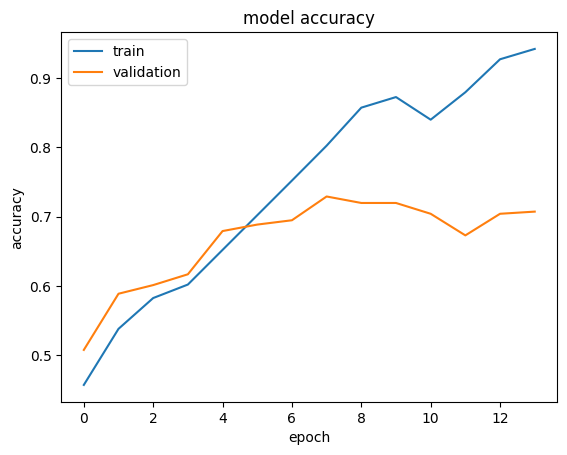

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# **Checking Test Accuracy**




In [29]:
model.evaluate(X_test, (Y_test_encoded))

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7239 - loss: 0.6437


[0.6768607497215271, 0.7212066054344177]

# **Observations**



*   the training didn't continue for all of the 60 epochs. Thra training stopped because the performance wasn't improving beyond a certain point
*   from the above plot, we observe that teh traning accuracy is continuously improving. However, that is not the case with validation accuracy. The validation accuracy started fluctuating after 6 epochs
*   All the above observations suggest that the model was overfitting on the training data.
*   However, the model was consistent on validation and test data.






35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
              precision    recall  f1-score   support

           0       0.75      0.44      0.56       362
           1       0.72      0.86      0.78       500
           2       0.70      0.86      0.77       232

    accuracy                           0.72      1094
   macro avg       0.72      0.72      0.70      1094
weighted avg       0.73      0.72      0.71      1094



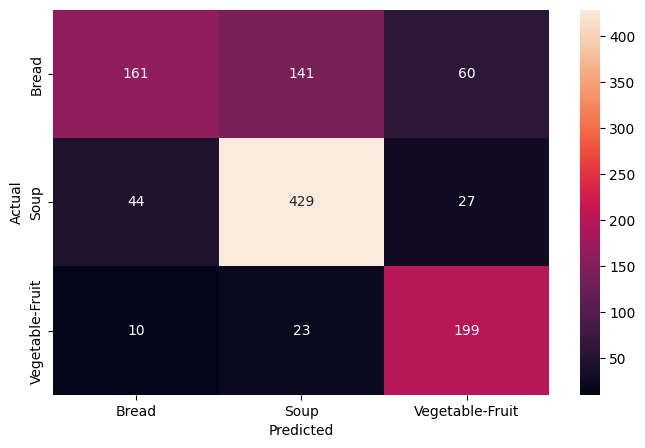

In [30]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = model.predict(X_test)
pred = np.argmax(pred, axis = 1)
Y_true = np.argmax(Y_test_encoded, axis = 1)

# Printing the classification report
print(classification_report(Y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(Y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Bread', 'Soup', 'Vegetable-Fruit'], yticklabels=['Bread', 'Soup', 'Vegetable-Fruit'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# **Observations**



*   The model is giving about 70% accuracy on test data
*   There have been many misclassifications between all classes
*   A large number of 'Bread' images were predicted to be 'Soup'. This could be the result of both classes showing a dish in their images
*   There have been misclassifications between 'Bread' and 'Vegetable-Fruit' as well. This could be because of the presence of yellowish pixels in both. Therefore, the model might have taken one for the other.
*   The misclassifications between 'Vegetable-Fruit' and 'Soup' have been the least

Let us now try to build another model with a different architecture and see if we can improve the model performance. Since the first model was overfitting, we will add Dropout layers at the end of each convolutional block.


# **Model 2 Architecture**



*   We plan on having 4 convolutional blocks in this Architecture, each having a Conv2D, MaxPooling2D, and a Dropout layer.
*   Add first Conv2D layer with 256 filters and a kernel size of 5x5. Use the 'same' padding and provide the input shape = (150, 150, 3). Use 'relu' activation.


*   Add MaxPooling2D layer with kernel size 2x2 and stride size 2x2.
*   Add a Dropout layer with a dropout ratio of 0.25.



*   Add a second Conv2D layer with 128 filters and a kernel size of 5x5. Use the 'same' padding and 'relu' activation.
*   Follow this up with a similar Maxpooling2D layer like above and a Dropout layer with 0.25 dropout ratio.



*   Add a third Conv2D layer with 64 filters and a kernel size of 3x3. Use the 'same' padding and 'relu' activation.
*   Follow this up with a similar Maxpooling2D layer and a Dropout layer with dropout ratio of 0.25.


*   Add a fourth Conv2D layer with 32 filters and a kernel size of 3x3. Use the 'same' padding and 'relu' activation.
*   Follow this up with a similar Maxpooling2D layer and a Dropout layer with dropout ratio of 0.25.


*   Once the convolutional blocks are added, add the Flatten layer.
*   Add first fully connected dense layer with 64 neurons and use 'relu' activation.


*   Add a second fully connected dense layer with 32 neurons and use 'relu' activation.
*   Add your final dense layer with 3 neurons and use 'softmax' activation function.



*   Initialize an Adam optimizer with a learning rate of 0.001.
*   Compile your model with the optimizer you initialized and use categorical_crossentropy as the loss function and the 'accuracy' as the metric.



*   Print your model summary and write down your observations.





In [31]:
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [32]:
# Initializing a sequential model
model_2 = Sequential()

# Adding first conv layer with 256 filters and kernel size 5x5, with ReLU activation and padding 'same' provides the output size same as the input size
# The input_shape denotes input image dimension
model_2.add(Conv2D(filters = 256, kernel_size = (5, 5), padding = 'Same', activation = 'relu', input_shape = (150, 150, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model_2.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

#  Adding dropout to randomly switch off 25% neurons to reduce overfitting
model_2.add(Dropout(0.25))

# Adding second conv layer with 128 filters and with kernel size 5x5 and ReLu activation function
model_2.add(Conv2D(filters = 128, kernel_size = (5, 5), padding = 'Same', activation = 'relu'))

# Adding max pooling to reduce the size of output of first conv layer
model_2.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

#  Adding dropout to randomly switch off 25% neurons to reduce overfitting
model_2.add(Dropout(0.25))

# Adding third conv layer with 64 filters and with kernel size 3x3 and ReLu activation function
model_2.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = 'Same', activation = 'relu'))

# Adding max pooling to reduce the size of output of first conv layer
model_2.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

#  Adding dropout to randomly switch off 25% neurons to reduce overfitting
model_2.add(Dropout(0.25))

# Adding fourth conv layer with 32 filters and with kernel size 3x3 and ReLu activation function
model_2.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'Same', activation = 'relu'))

# Adding max pooling to reduce the size of output of first conv layer
model_2.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

#  Adding dropout to randomly switch off 25% neurons to reduce overfitting
model_2.add(Dropout(0.25))

# Flattening the 3-d output of the conv layer after max pooling to make it ready for creating dense connections
model_2.add(Flatten())

# Adding first fully connected dense layer with 64 neurons
model_2.add(Dense(64, activation = "relu"))

# Adding second fully connected dense layer with 32 neurons
model_2.add(Dense(32, activation = "relu"))

# Adding the output layer with 3 neurons and activation functions as softmax since this is a multi-class classification problem
model_2.add(Dense(3, activation = "softmax"))

# Using Adam Optimizer
optimizer = Adam(learning_rate = 0.001)

# Compile the model
model_2.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics = ["accuracy"])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 256)  │        19,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 75, 75, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 75, 75, 128)    │       819,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 37, 37, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 9, 9, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2592)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       165,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,099,171 (4.19 MB)

 Trainable params: 1,099,171 (4.19 MB)

 Non-trainable params: 0 (0.00 B)

# **Observations**



*   We can observe from the above summary that this CNN model will trian and learn 1,099,171 parameters (weights and biases). However, since we have dropout layers as the training progresses few of the nuerons will be dropped and thus effective trainable parameters will also be less
*   This model has more convolutional blocks and hence, we can expect this model to perform better in extracting features from the images.
*   We are using a different optimizer called Adam. Let's see if we receive any improvement in performance.

# **Training the model**




In [34]:
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
mc = ModelCheckpoint('best_model.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)

history=model_2.fit(X_train,
          Y_train_encoded,
          epochs = 60,
          batch_size = 32, validation_split = 0.10,
          callbacks = [es, mc])

Epoch 1/60
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - accuracy: 0.4016 - loss: 1.0929
Epoch 1: val_accuracy improved from -inf to 0.48910, saving model to best_model.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 56s 359ms/step - accuracy: 0.4021 - loss: 1.0927 - val_accuracy: 0.4891 - val_loss: 1.0463
Epoch 2/60
90/91 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - accuracy: 0.4411 - loss: 1.0682
Epoch 2: val_accuracy improved from 0.48910 to 0.54206, saving model to best_model.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 19s 212ms/step - accuracy: 0.4416 - loss: 1.0679 - val_accuracy: 0.5421 - val_loss: 1.0097
Epoch 3/60
90/91 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step - accuracy: 0.5127 - loss: 0.9295
Epoch 3: val_accuracy improved from 0.54206 to 0.63863, saving model to best_model.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 19s 214ms/step - accuracy: 0.5135 - loss: 0.9287 - val_accuracy: 0.6386 - val_loss: 0.8025
Epoch 4/60
90/91 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step - accuracy: 0.5856 - loss: 0.8324
Epoch 4: val_accuracy did not improve from 0.63863
91/91 ━━━━━━━━━━━━━━━━━━━━ 19s 211ms/step - accuracy: 0.5857 - loss: 0.8323 - val_accuracy: 0.6324 - val_loss: 0.7771
Epoch 5/60
90/91 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step - accuracy: 0.6078 - loss: 0.7803
Epoch 5: val_accuracy did not improve from 0.63863
91/91 ━━━━━━━━━━━━━━━━━━━━ 19s 208ms/step - accuracy: 0.6078 - loss: 0.7803 - val_accuracy: 0.5140 - val_loss: 0.8818
Epoch 6/60
90/91 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step - accuracy: 0.6087 - loss: 0.7705
Epoch 6: val_accuracy improved from 0.63863 to 0.65109, saving model to best_model.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 19s 210ms/step - accuracy: 0.6092 - loss: 0.7701 - val_accuracy: 0.6511 - val_loss: 0.7343
Epoch 7/60
90/91 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - accuracy: 0.6659 - loss: 0.6950
Epoch 7: val_accuracy improved from 0.65109 to 0.70093, saving model to best_model.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 19s 210ms/step - accuracy: 0.6661 - loss: 0.6949 - val_accuracy: 0.7009 - val_loss: 0.6770
Epoch 8/60
90/91 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step - accuracy: 0.7070 - loss: 0.6425
Epoch 8: val_accuracy did not improve from 0.70093
91/91 ━━━━━━━━━━━━━━━━━━━━ 19s 210ms/step - accuracy: 0.7071 - loss: 0.6425 - val_accuracy: 0.6604 - val_loss: 0.7085
Epoch 9/60
90/91 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - accuracy: 0.7180 - loss: 0.6274
Epoch 9: val_accuracy improved from 0.70093 to 0.73520, saving model to best_model.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 19s 210ms/step - accuracy: 0.7184 - loss: 0.6269 - val_accuracy: 0.7352 - val_loss: 0.6320
Epoch 10/60
90/91 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - accuracy: 0.7558 - loss: 0.5606
Epoch 10: val_accuracy did not improve from 0.73520
91/91 ━━━━━━━━━━━━━━━━━━━━ 19s 212ms/step - accuracy: 0.7559 - loss: 0.5605 - val_accuracy: 0.6760 - val_loss: 0.6462
Epoch 11/60
90/91 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step - accuracy: 0.7775 - loss: 0.5121
Epoch 11: val_accuracy did not improve from 0.73520
91/91 ━━━━━━━━━━━━━━━━━━━━ 19s 209ms/step - accuracy: 0.7777 - loss: 0.5117 - val_accuracy: 0.6698 - val_loss: 0.6503
Epoch 12/60
90/91 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - accuracy: 0.7818 - loss: 0.4994
Epoch 12: val_accuracy improved from 0.73520 to 0.76012, saving model to best_model.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 19s 210ms/step - accuracy: 0.7820 - loss: 0.4990 - val_accuracy: 0.7601 - val_loss: 0.5749
Epoch 13/60
90/91 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - accuracy: 0.8092 - loss: 0.4295
Epoch 13: val_accuracy did not improve from 0.76012
91/91 ━━━━━━━━━━━━━━━━━━━━ 19s 209ms/step - accuracy: 0.8093 - loss: 0.4294 - val_accuracy: 0.7445 - val_loss: 0.5730
Epoch 14/60
90/91 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - accuracy: 0.8242 - loss: 0.4305
Epoch 14: val_accuracy improved from 0.76012 to 0.76324, saving model to best_model.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 19s 210ms/step - accuracy: 0.8242 - loss: 0.4305 - val_accuracy: 0.7632 - val_loss: 0.5921
Epoch 15/60
90/91 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - accuracy: 0.8390 - loss: 0.3782
Epoch 15: val_accuracy did not improve from 0.76324
91/91 ━━━━━━━━━━━━━━━━━━━━ 19s 210ms/step - accuracy: 0.8393 - loss: 0.3776 - val_accuracy: 0.7570 - val_loss: 0.5906
Epoch 16/60
90/91 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - accuracy: 0.8691 - loss: 0.3475
Epoch 16: val_accuracy did not improve from 0.76324
91/91 ━━━━━━━━━━━━━━━━━━━━ 19s 210ms/step - accuracy: 0.8692 - loss: 0.3471 - val_accuracy: 0.7321 - val_loss: 0.6324
Epoch 17/60
90/91 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - accuracy: 0.8599 - loss: 0.3512
Epoch 17: val_accuracy improved from 0.76324 to 0.76947, saving model to best_model.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 19s 210ms/step - accuracy: 0.8602 - loss: 0.3504 - val_accuracy: 0.7695 - val_loss: 0.5444
Epoch 18/60
90/91 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - accuracy: 0.8798 - loss: 0.3004
Epoch 18: val_accuracy improved from 0.76947 to 0.80062, saving model to best_model.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 19s 210ms/step - accuracy: 0.8799 - loss: 0.2999 - val_accuracy: 0.8006 - val_loss: 0.5128
Epoch 19/60
90/91 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step - accuracy: 0.8999 - loss: 0.2599
Epoch 19: val_accuracy did not improve from 0.80062
91/91 ━━━━━━━━━━━━━━━━━━━━ 19s 210ms/step - accuracy: 0.9001 - loss: 0.2597 - val_accuracy: 0.7819 - val_loss: 0.5985
Epoch 20/60
90/91 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - accuracy: 0.8793 - loss: 0.2943
Epoch 20: val_accuracy did not improve from 0.80062
91/91 ━━━━━━━━━━━━━━━━━━━━ 19s 209ms/step - accuracy: 0.8794 - loss: 0.2943 - val_accuracy: 0.7757 - val_loss: 0.5794
Epoch 21/60
90/91 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step - accuracy: 0.9048 - loss: 0.2399
Epoch 21: val_accuracy improved from 0.80062 to 0.80374, saving model to best_model.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 19s 211ms/step - accuracy: 0.9050 - loss: 0.2394 - val_accuracy: 0.8037 - val_loss: 0.5948
Epoch 22/60
90/91 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - accuracy: 0.9262 - loss: 0.2061
Epoch 22: val_accuracy did not improve from 0.80374
91/91 ━━━━━━━━━━━━━━━━━━━━ 19s 209ms/step - accuracy: 0.9263 - loss: 0.2056 - val_accuracy: 0.8006 - val_loss: 0.6155
Epoch 23/60
90/91 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - accuracy: 0.9361 - loss: 0.1585
Epoch 23: val_accuracy did not improve from 0.80374
91/91 ━━━━━━━━━━━━━━━━━━━━ 19s 209ms/step - accuracy: 0.9360 - loss: 0.1588 - val_accuracy: 0.7975 - val_loss: 0.5877
Epoch 23: early stopping


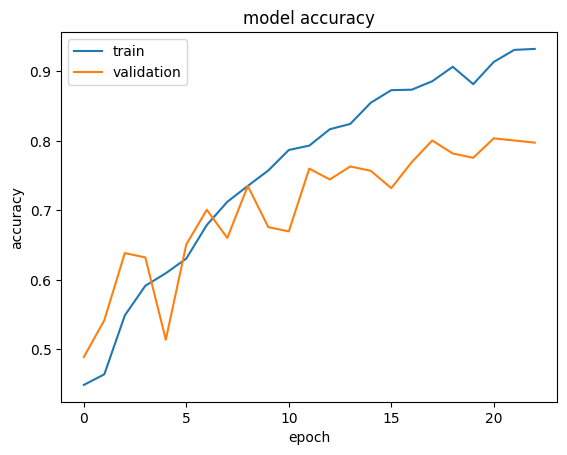

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

# **Checking Test Accuracy**

In [36]:
model_2.evaluate(X_test, Y_test_encoded)

35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.7921 - loss: 0.6497


[0.6855624914169312, 0.7870200872421265]

# **Observations**



*   By comparing the train and validation accuracy, it seems the model is not overfitting as much. So adding Dropout layers definitely proved beneficial.
*   The validation accuracy stopped showing any significant improvements after about 23 epochs, however, the test accuracy has improved significantly.



35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step
              precision    recall  f1-score   support

           0       0.76      0.61      0.68       362
           1       0.81      0.88      0.84       500
           2       0.77      0.87      0.82       232

    accuracy                           0.79      1094
   macro avg       0.78      0.79      0.78      1094
weighted avg       0.78      0.79      0.78      1094



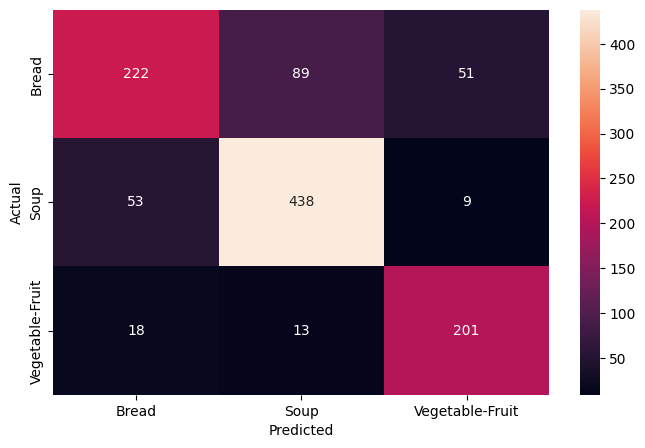

In [37]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = model_2.predict(X_test)
pred = np.argmax(pred, axis = 1)
Y_true = np.argmax(Y_test_encoded, axis = 1)

#Printing the classification report
print(classification_report(Y_true, pred))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(Y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Bread', 'Soup', 'Vegetable-Fruit'], yticklabels = ['Bread', 'Soup', 'Vegetable-Fruit'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# **Observations**



*   The misclassifications are very less in comparison to the previous model.
*   Bread and Soup continue to be the most misclassified classes. However, it's not as bad as the previous model.
*   We can still try to add more layers to see if we can bring down the misclassification further.





# **Prediction**

Let us predict using the best model, i.e., model 2, by plotting one random image from X_test data and see if our model is predicting the image correctly or not

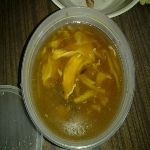

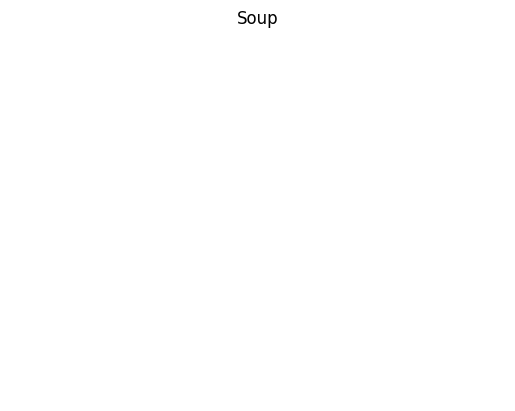

In [38]:
# Plotting the test image
cv2_imshow(X_test[1] * 255)  # Multiplying with 255, because X_test was previously normalized.
i = np.argmax(Y_test_encoded[1])
if(i == 0):
    plt.title("Bread")
if(i == 1):
    plt.title("Soup")
if(i == 2):
    plt.title("Vegetable-Fruit")

plt.axis('off')
plt.show()

In [39]:
# Predicting the test image with the best model and storing the prediction value in res variable
res = model_2.predict(X_test[1].reshape(1, 150, 150, 3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


In [40]:
# Applying argmax on the prediction to get the highest index value
i=np.argmax(res)
if(i == 0):
    print("Bread")
if(i==1):
    print("Soup")
if(i==2):
    print("Vegetable-Fruit")

Soup


# **Observations**



*   The model is able to correct classify the image we have randomly chosen from the test data.

# **Conclusions and Recommendations**



1.   As we have seen, the second CNN model was able to predict the test image correctly with a test accuracy of basically 80%
2.   There is still room for improvement in the test accuracy of the CNN model chosen here. Different architectures and optimizers can be used to build a better food classifier.
3.   Transfer learning can be applied to the dataset to improve accuracy. You can choose among multiple pre-trained models available in the Keras framework.
4.   Once the desired performance is achieved from the model, the company can use it to classify different images being uploaded to the website.
5.   We can further try to improve the performance of the CNN model by using some of the below techniques and see if you can increase accuracy:



*   We can try hyperparameter tuning for some of the hyperparameters like the number of convolutional blocks, the number of filters in each Conv2D layer, filter size, activation function, adding/removing dropout layers, changing the dropout ratio, etc.
*   Data Augmentation might help to make the model more robust and invariant toward different orientations.



